In [1]:
import pandas as pd
import numpy as np

from pipeline import vector_comparison

import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('data/training.csv', index_col = 0)
df = df.iloc[:10000] #need to limit rows while running on local machine.

In [3]:
model1 = vector_comparison(df)

In [4]:
#split the data into train and test portions
train, test = model1.split_data(['question1','question2'],'is_duplicate')

#fit all the training data to td-idf, default settings for this model
model1.fit_tfidf()

#transform test questions into two vectors
q1 = model1.transform_tfidf(test['question1'])
q2 = model1.transform_tfidf(test['question2'])

#calculates the cosine similarity results
results = model1.compute_cosine_similarity(q1,q2)


model1.return_df_w_results(results)
model1.compute_confusion_matrix()
thresh, TPR1, FPR1 = model1.draw_roc()

In [5]:
model2 = vector_comparison(df)

In [6]:
train, test = model2.split_data(['question1','question2'],'is_duplicate')
model2.fit_tfidf(stopwords = 'english')
q1_model2 = model2.transform_tfidf(test['question1'])
q2_model2 = model2.transform_tfidf(test['question2'])
results_2 = model2.compute_cosine_similarity(q1_model2,q2_model2)
model2.return_df_w_results(results_2)
model2.compute_confusion_matrix()
thresh, TPR2, FPR2 = model2.draw_roc()

In [7]:
model3 = vector_comparison(df)

train, test = model3.split_data(['question1','question2'],'is_duplicate')
model3.fit_tfidf(ngram_range=(1,2))
q1_model3 = model3.transform_tfidf(test['question1'])
q2_model3 = model3.transform_tfidf(test['question2'])
results_3 = model3.compute_cosine_similarity(q1_model3,q2_model3)
model3.return_df_w_results(results_3)
model3.compute_confusion_matrix()
thresh, TPR3, FPR3 = model3.draw_roc()


In [8]:
model4 = vector_comparison(df)

train, test = model4.split_data(['question1','question2'],'is_duplicate')
model4.fit_tfidf(ngram_range=(1,2), max_df = 0.5)
q1_model4 = model4.transform_tfidf(test['question1'])
q2_model4 = model4.transform_tfidf(test['question2'])
results_4 = model4.compute_cosine_similarity(q1_model4,q2_model4)
model4.return_df_w_results(results_4)
model4.compute_confusion_matrix()
thresh, TPR4, FPR4 = model4.draw_roc()

In [9]:
model5 = vector_comparison(df)

train, test = model5.split_data(['question1','question2'],'is_duplicate')
model5.fit_tfidf(stopwords = 'english', ngram_range=(1,2), max_df = 0.5, max_features = 8000)
q1_model5 = model5.transform_tfidf(test['question1'])
q2_model5 = model5.transform_tfidf(test['question2'])
results_5 = model5.compute_cosine_similarity(q1_model5,q2_model5)
model5.return_df_w_results(results_5)
model5.compute_confusion_matrix()
thresh, TPR5, FPR5 = model5.draw_roc()

Text(0.5, 1.0, 'Model Performance')

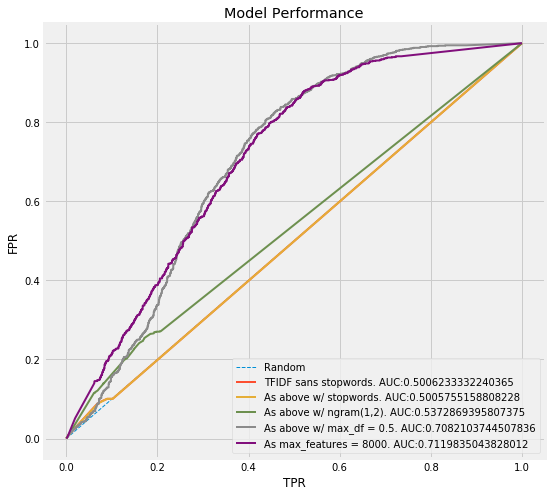

In [10]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot([0,1], label = 'Random', linestyle='dashed', linewidth = 1)
ax.plot(FPR2,TPR2, label = f'TFIDF sans stopwords. AUC:{model2.roc_auc_score}',linewidth=2)
ax.plot(FPR1,TPR1, label = f'As above w/ stopwords. AUC:{model1.roc_auc_score}',linewidth=2)
ax.plot(FPR3,TPR3, label = f'As above w/ ngram(1,2). AUC:{model3.roc_auc_score}',linewidth=2)
ax.plot(FPR4,TPR4, label = f'As above w/ max_df = 0.5. AUC:{model4.roc_auc_score}',linewidth=2)
ax.plot(FPR5,TPR5, label = f'As max_features = 8000. AUC:{model5.roc_auc_score}',linewidth=2)

plt.xlabel('TPR')
plt.ylabel('FPR')

plt.legend(loc="lower right")
plt.title("Model Performance")

In [11]:

model5.model_report()

412   350
524   1214


' TP:412, FP: 350, FN:524, TN: 1214 TPR: 0.44017094017094016, FPR: 0.7762148337595908, Accuracy: 0.6504, Precison: 0.5406824146981627'

In [12]:
model5.optimize_threshold()

(0.6544, 0.564)

In [13]:
distances = ['braycurtis', 'canberra', 'chebyshev', 'correlation', 'dice', 
 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'minkowski',
 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 
 'sokalsneath', 'sqeuclidean', 'yule'] 

In [14]:
distances

['braycurtis',
 'canberra',
 'chebyshev',
 'correlation',
 'dice',
 'hamming',
 'jaccard',
 'kulsinski',
 'mahalanobis',
 'minkowski',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule']